In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fake-news-detection/true.csv
/kaggle/input/fake-news-detection/fake.csv


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report


In [47]:
import pandas as pd #loading true news data
df = pd.read_csv('/kaggle/input/fake-news-classification/WELFake_Dataset.csv')  # Adjust path if needed
df.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [48]:
print(df.isna().sum()) #to check missing values


Unnamed: 0      0
title         558
text           39
label           0
dtype: int64


In [49]:
#to handle missing values
df.dropna(inplace=True)


In [50]:
df['label'] = df['label'].map({'fake': 0, 'real': 1})  # Convert labels to 0 and 1


In [52]:
#adding stopwords and removing special characters 
stop_words = set([
    "i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", 
    "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her",
    "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs",
    "themselves", "what", "which", "who", "whom", "this", "that", "these", "those",
    "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had",
    "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if",
    "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", 
    "about", "against", "between", "into", "through", "during", "before", "after",
    "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over",
    "under", "again", "further", "then", "once", "here", "there", "when", "where",
    "why", "how", "all", "any", "both", "each", "few", "more", "most", "other",
    "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", 
    "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"
])

def clean_text(text):
    text = text.lower()
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    text = ' '.join([word for word in text.split() if word not in stop_words])  
    return text

df['cleaned_text'] = df['text'].apply(clean_text)




In [53]:
#feature engineering
#converting text into numerical form
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['cleaned_text']).toarray()
y = df['label']


In [54]:
#splitting into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [62]:
import pandas as pd

# Reload the dataset
df = pd.read_csv("/kaggle/input/fake-news-classification/WELFake_Dataset.csv")  # Change to actual file path

# Check for missing labels
print(df['label'].isna().sum())  # Should print 0

# Ensure 'label' contains only 0 and 1
print(df['label'].unique())  # Should print [0, 1]


0
[1 0]


In [66]:
df = df.dropna(subset=['text'])  # Drop rows with missing text


In [67]:
print(df['text'].isna().sum())  # Should print 0


0


In [69]:
X = df['text']  # Use text column as input
y = df['label'].astype(int)  # Convert labels to integers


In [70]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(len(X_train), len(X_test))  # Should be > 0


57676 14419


In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [72]:
# using naive bayes
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train_tfidf, y_train)  


MultinomialNB()

Accuracy: 0.8386157153755461
              precision    recall  f1-score   support

           0       0.85      0.81      0.83      7010
           1       0.83      0.86      0.85      7409

    accuracy                           0.84     14419
   macro avg       0.84      0.84      0.84     14419
weighted avg       0.84      0.84      0.84     14419



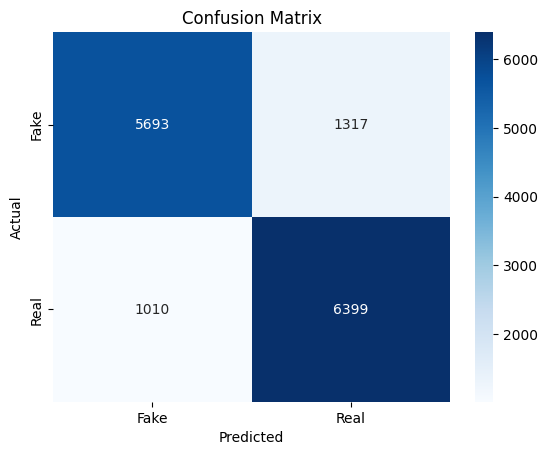

In [73]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict on test data
y_pred = model.predict(X_test_tfidf)

# Print Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Print Detailed Classification Report
print(classification_report(y_test, y_pred))

# Print Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Fake", "Real"], yticklabels=["Fake", "Real"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [74]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=500)
log_model.fit(X_train_tfidf, y_train)
log_pred = log_model.predict(X_test_tfidf)

print("Logistic Regression Accuracy:", accuracy_score(y_test, log_pred))


Logistic Regression Accuracy: 0.9418822387128095


In [75]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Train Model
log_model = LogisticRegression(max_iter=500)
log_model.fit(X_train_tfidf, y_train)

# Predict
train_preds = log_model.predict(X_train_tfidf)
test_preds = log_model.predict(X_test_tfidf)

# Get Accuracy Scores
train_acc = accuracy_score(y_train, train_preds)
test_acc = accuracy_score(y_test, test_preds)

print("Training Accuracy:", train_acc)
print("Testing Accuracy:", test_acc)


Training Accuracy: 0.9524585616200846
Testing Accuracy: 0.9418822387128095


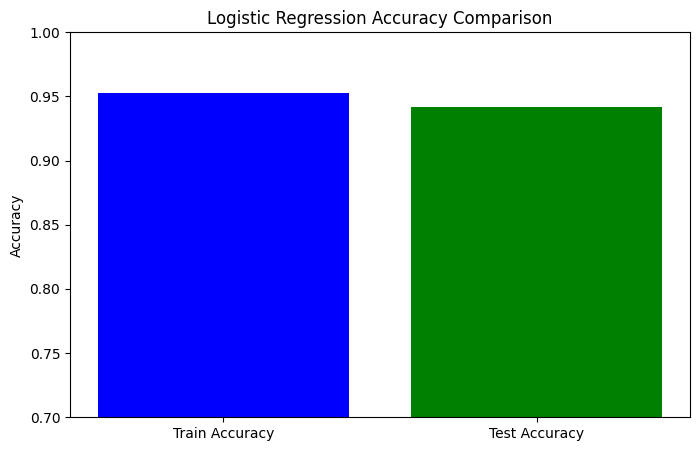

In [76]:
plt.figure(figsize=(8, 5))
plt.bar(["Train Accuracy", "Test Accuracy"], [train_acc, test_acc], color=['blue', 'green'])
plt.ylabel("Accuracy")
plt.title("Logistic Regression Accuracy Comparison")
plt.ylim(0.7, 1)
plt.show()
